# ADS - Network analysis module, homework 1

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
import statsmodels.formula.api as smf
import pylab as pl

# Make plots prettyful
pl.style.use('fivethirtyeight')

In [4]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework1/lesmis.gml
G = nx.read_gml('lesmis.gml')

In [12]:
G.nodes(True)

[(0, {'id': 0, 'label': u'Myriel'}),
 (1, {'id': 1, 'label': u'Napoleon'}),
 (2, {'id': 2, 'label': u'MlleBaptistine'}),
 (3, {'id': 3, 'label': u'MmeMagloire'}),
 (4, {'id': 4, 'label': u'CountessDeLo'}),
 (5, {'id': 5, 'label': u'Geborand'}),
 (6, {'id': 6, 'label': u'Champtercier'}),
 (7, {'id': 7, 'label': u'Cravatte'}),
 (8, {'id': 8, 'label': u'Count'}),
 (9, {'id': 9, 'label': u'OldMan'}),
 (10, {'id': 10, 'label': u'Labarre'}),
 (11, {'id': 11, 'label': u'Valjean'}),
 (12, {'id': 12, 'label': u'Marguerite'}),
 (13, {'id': 13, 'label': u'MmeDeR'}),
 (14, {'id': 14, 'label': u'Isabeau'}),
 (15, {'id': 15, 'label': u'Gervais'}),
 (16, {'id': 16, 'label': u'Tholomyes'}),
 (17, {'id': 17, 'label': u'Listolier'}),
 (18, {'id': 18, 'label': u'Fameuil'}),
 (19, {'id': 19, 'label': u'Blacheville'}),
 (20, {'id': 20, 'label': u'Favourite'}),
 (21, {'id': 21, 'label': u'Dahlia'}),
 (22, {'id': 22, 'label': u'Zephine'}),
 (23, {'id': 23, 'label': u'Fantine'}),
 (24, {'id': 24, 'label': u'M

## Problem 1 (20% of credit) 
Visualize the network with node labes and sizes proportional to node degree

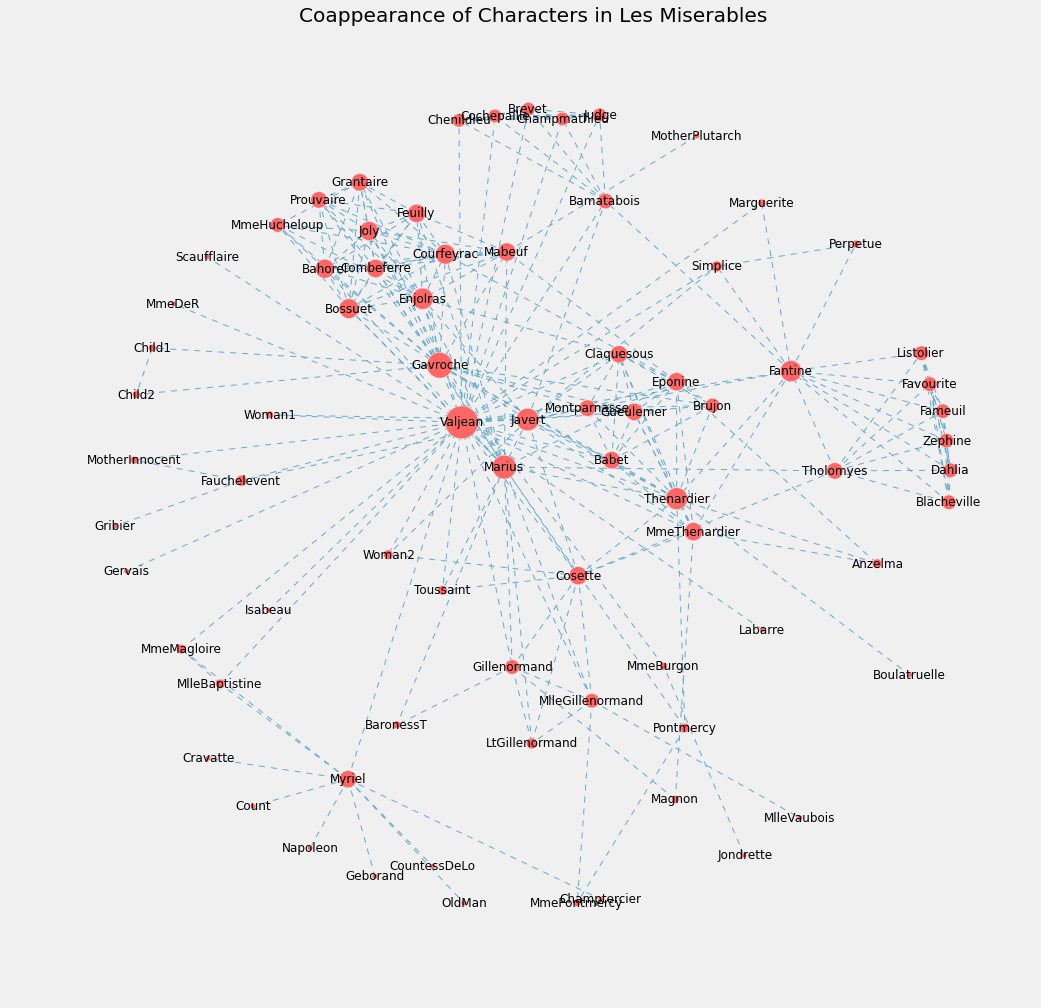

In [8]:
figure, ax = pl.subplots(figsize=(16,16))
nx.draw_networkx(
    G, 
    labels=dict([(id, n['label']) for id,n in G.nodes(True)]), 
    #with_labels=True,
    pos=nx.spring_layout(G, k=.13),
    iterations=100,
    ax=ax, 
    edge_color='#66aacc',
    style='dashed',
    node_size=np.array(G.degree().values())*30,
    node_color='#ff6666'
)

# Increase size of plot
ax.set_xlim([-.1,1.1])
ax.set_ylim([-.1,1.1])

# Turn off the axis
pl.axis('off')
ax.set_title('Coappearance of Characters in Les Miserables')

## Problem 2 (30% of credit)
Output the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) eigenvector centrality;

c) betweenness centrality;

d) closeness centrality;

In [5]:
# Loop through each of the centrality functions
for centrality in [nx.degree_centrality, nx.eigenvector_centrality, nx.betweenness_centrality, nx.closeness_centrality]:
    
    # Print the name
    print centrality.__name__
    
    # Get the top five scores
    top = sorted([(i,c) for i,c in centrality(G).iteritems()], key  = lambda x: x[1], reverse=True)[:5]
    
    # Print the name and score
    for i,c in top:
        print G.node[i]['label'], '(%s)' % c
    print

degree_centrality
Valjean (0.473684210526)
Gavroche (0.289473684211)
Marius (0.25)
Javert (0.223684210526)
Thenardier (0.210526315789)

eigenvector_centrality
Gavroche (0.31783957195)
Valjean (0.267615018)
Enjolras (0.267179944486)
Marius (0.259111666033)
Bossuet (0.242132519653)

betweenness_centrality
Valjean (0.569989052784)
Myriel (0.176842105263)
Gavroche (0.165112502426)
Marius (0.132032488622)
Fantine (0.129644540988)

closeness_centrality
Valjean (0.64406779661)
Marius (0.531468531469)
Thenardier (0.517006802721)
Javert (0.517006802721)
Gavroche (0.513513513514)



## Problem 3 (25% of credit)
Analyze the impact of damping parameter $\alpha$ in pagerank centrality for the given network: compare top 5 nodes for different values of $\alpha=0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1$ and point out an interval for which the ranking remains mostly stable.

0.1
Valjean (0.0248704710949)
Myriel (0.0209104237353)
Gavroche (0.0157977634848)
Thenardier (0.0151672203772)
Javert (0.0150970872854)

0.2
Valjean (0.035419493802)
Myriel (0.0274951200067)
Gavroche (0.018583426528)
Thenardier (0.0171858654261)
Javert (0.0171489842896)

0.3
Valjean (0.0447492131531)
Myriel (0.0329554662466)
Gavroche (0.0213294965965)
Javert (0.0191648838531)
Thenardier (0.0190587765764)

0.4
Valjean (0.0529448267787)
Myriel (0.037425254931)
Gavroche (0.0240238928858)
Javert (0.0211639052314)
Marius (0.0209050257461)

0.5
Valjean (0.0600548187154)
Myriel (0.0409702412016)
Gavroche (0.0266583165639)
Javert (0.0231621382824)
Marius (0.0229752075528)

0.6
Valjean (0.0660813647846)
Myriel (0.0435500325678)
Gavroche (0.0292325038599)
Javert (0.0251726803596)
Marius (0.0250871790501)

0.7
Valjean (0.0709527717328)
Myriel (0.0448978476113)
Gavroche (0.031767940065)
Marius (0.0272670158917)
Javert (0.027205254098)

0.8
Valjean (0.0744218463133)
Myriel (0.0443411025859)
Gavroch

(-1, 4)

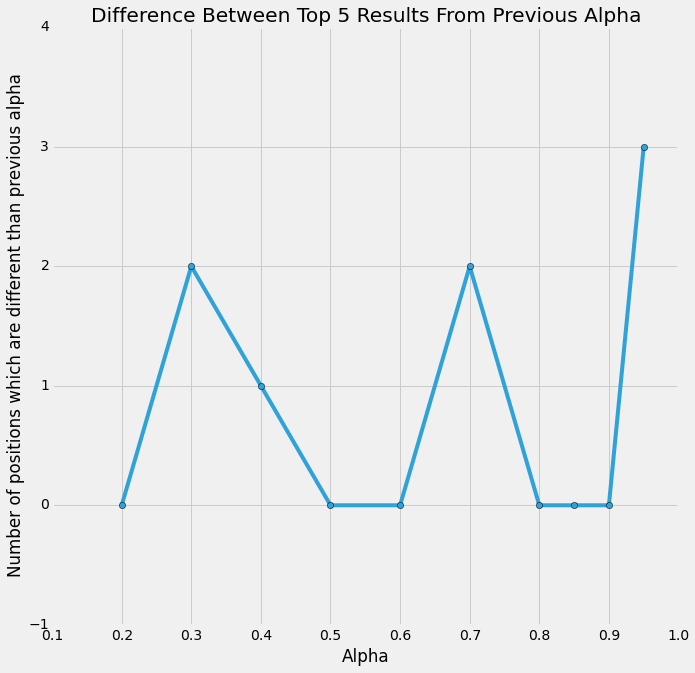

In [6]:
# List for results
results = []

# Alpha values to use
alphas = np.append(np.arange(.1,.9,.1), np.arange(.85,1.,.05))[:-1]

# Loop through each alpha
for a in alphas:
    
    # Compute page rank for the Alpha
    top = sorted([(i,c) for i,c in nx.pagerank(G,a ).iteritems()], key  = lambda x: x[1], reverse=True)[:5]
    
    # Print top 5
    print a
    for i,c in top:
        print G.node[i]['label'], '(%s)' % c
    print
    
    # Save results for comparison later
    results.append((a,top))
    
# Compare two arrays compopnent wise.  Increases by one for each element that is not equal.
def diffResults(a,b):
    d = 0
    for i in range(len(a)):
        d += (a[i][0] != b[i][0])
    return d

# Calculate diffs between adjacent alphas
diffs = []
for i in range(1,len(results)):
    diffs.append(diffResults(results[i][1], results[i-1][1]))

# Plot the results
figure, ax = pl.subplots(figsize=(10,10))
ax.plot(alphas[1:], diffs, 'o-')
ax.set_title('Difference Between Top 5 Results From Previous Alpha')
ax.set_xlabel('Alpha')
ax.set_ylabel('Number of positions which are different than previous alpha')
ax.set_xlim([.1,1])
ax.set_ylim([-1,4])

Considering stability as whether each rank is the same as it was with the previous alpha, .4-.6 and .7-.9 are the most stable ranges

## Problem 4 (25% of credit) 
Analyze the degree distribution - visualize it and try to fit with a lognormal distribution.

In [7]:
# Get Degree values
degrees = np.array(G.degree().values())

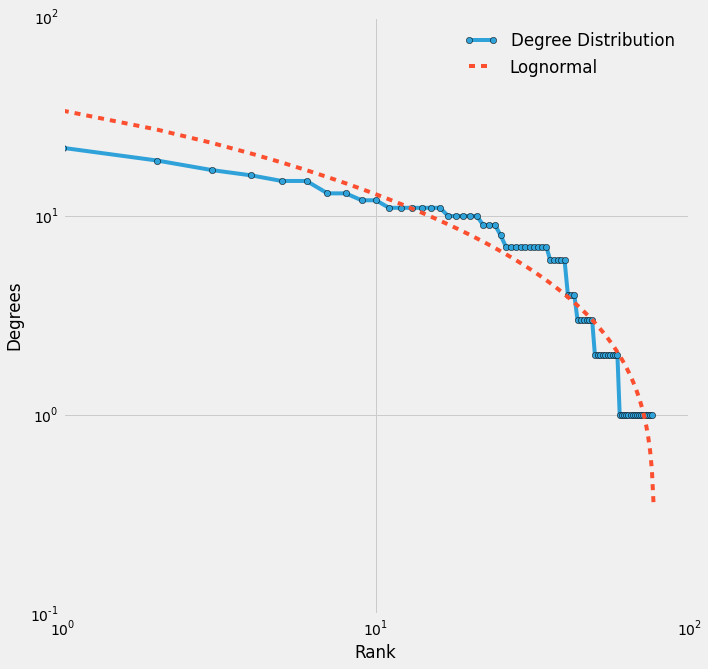

In [8]:
# Fit as done
figure, ax = pl.subplots(figsize=(10,10))

# Sort degrees
xs = sorted(degrees, reverse=True)

# Plot degrees
ax.loglog(xs,'-',marker='o',label='Degree Distribution')

# Fit lognorm
xl=log(xs)
sigma=std(xl)
mu=mean(xl)  
ln=exp(mu)*stat.lognorm.ppf((np.array(range(0,len(xl)+1))+0.5)/(len(xl)+1),sigma)[::-1]
ax.loglog(ln,'--', label='Lognormal')

ax.set_ylabel('Degrees')
ax.set_xlabel('Rank')
ax.legend()